In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error
print("✅ Библиотеки загружены!")

✅ Библиотеки загружены!


# 🎯 ДЗ 2: ФИЛЬТРАЦИЯ ШУМОВ НА ЦВЕТНОМ ИЗОБРАЖЕНИИ

## 1. 📷 ЗАГРУЗКА ЦВЕТНОГО ИЗОБРАЖЕНИЯ

✅ Изображение успешно загружено!
   Размер: (4000, 6000, 3)
   Цветовые каналы: 3


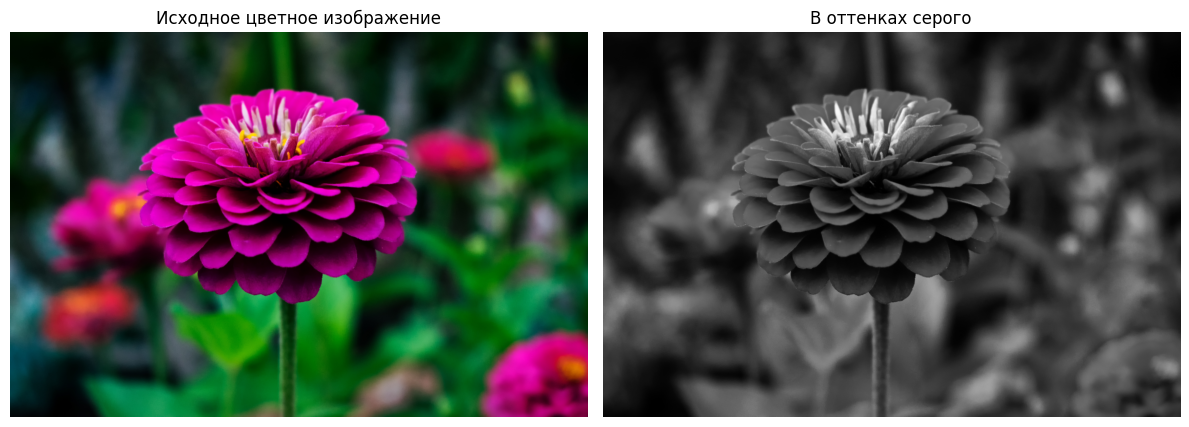

In [2]:
image = cv2.imread('img.jpg')
if image is None:
    print("❌ ОШИБКА: Файл 'img.jpg' не найден!")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    print("✅ Изображение успешно загружено!")
    print(f"   Размер: {image.shape}")
    print(f"   Цветовые каналы: {image.shape[2]}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Исходное цветное изображение')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_gray, cmap='gray')
    plt.title('В оттенках серого')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

## 2. 🌪️ ДОБАВЛЕНИЕ ГАУССОВСКОГО ШУМА

✅ Гауссовский шум добавлен!
   Параметры: mean=0, stddev=30


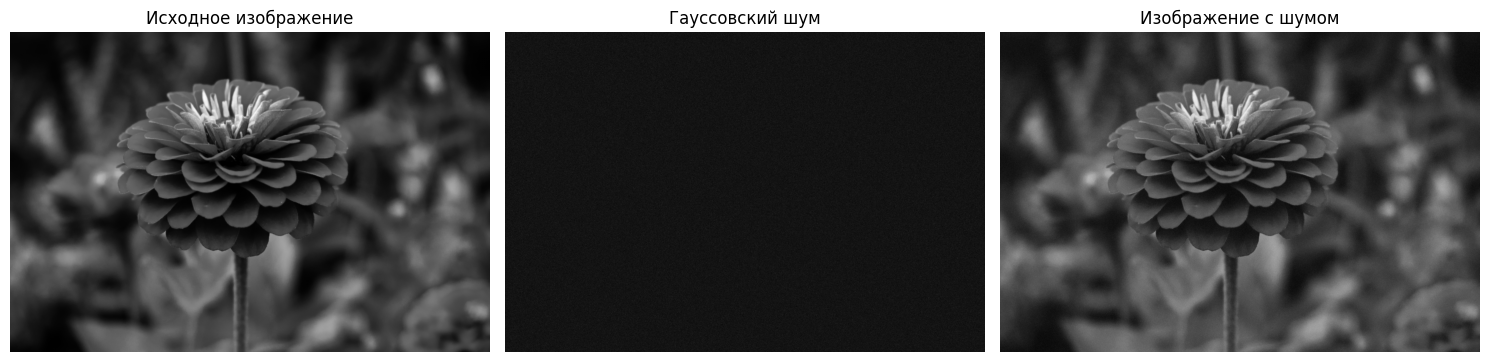

In [3]:
mean = 0
stddev = 30
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image_gray, noise_gauss)

print(f"✅ Гауссовский шум добавлен!")
print(f"   Параметры: mean={mean}, stddev={stddev}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noise_gauss, cmap='gray')
plt.title('Гауссовский шум')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_noise_gauss, cmap='gray')
plt.title('Изображение с шумом')
plt.axis('off')
plt.tight_layout()
plt.show()

## 3. 📊 ДОБАВЛЕНИЕ РАВНОМЕРНОГО ШУМА

✅ Равномерный шум добавлен!
   Диапазон шума: [0, 30]


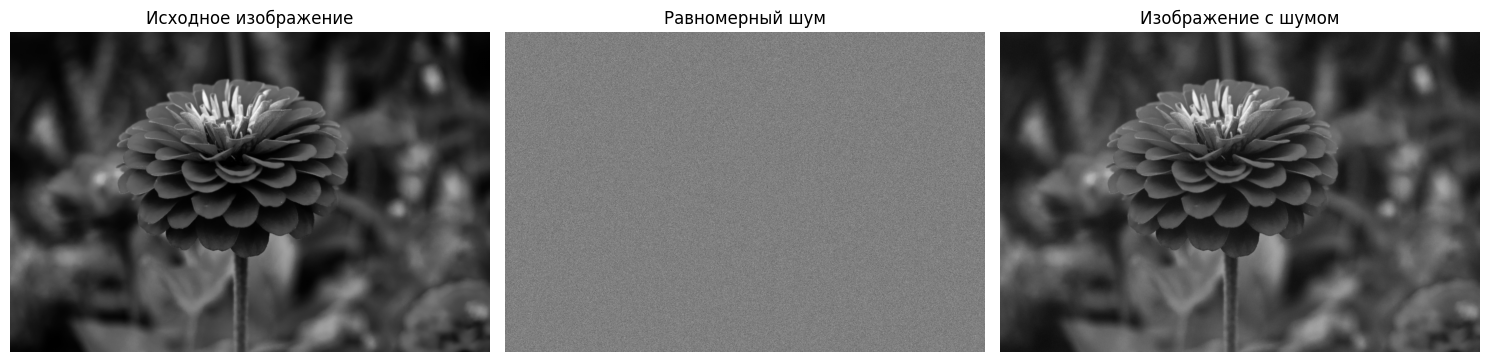

In [4]:
uniform_noise = np.random.randint(0, 30, image_gray.shape).astype("uint8")
image_noise_uniform = cv2.add(image_gray, uniform_noise)

print("✅ Равномерный шум добавлен!")
print(f"   Диапазон шума: [0, 30]")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(uniform_noise, cmap='gray')
plt.title('Равномерный шум')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_noise_uniform, cmap='gray')
plt.title('Изображение с шумом')
plt.axis('off')
plt.tight_layout()
plt.show()

## 4. 🔧 ФИЛЬТРАЦИЯ ГАУССОВСКОГО ШУМА

📊 РЕЙТИНГ ФИЛЬТРОВ ДЛЯ ГАУССОВСКОГО ШУМА:
   1: Нелок. средних h=20       MSE:    148.1, SSIM: 0.7978
   2: Билатеральный (15,100,100) MSE:    148.4, SSIM: 0.7929
   3: Билатеральный (9,75,75)   MSE:    146.4, SSIM: 0.7696
   4: Медианный (5x5)           MSE:     49.6, SSIM: 0.7441
   5: Гаусса (5x5)              MSE:    173.8, SSIM: 0.6801
   6: Медианный (3x3)           MSE:     88.3, SSIM: 0.6019
   7: Гаусса (3x3)              MSE:    191.9, SSIM: 0.5899
   8: Нелок. средних h=10       MSE:    253.8, SSIM: 0.4389


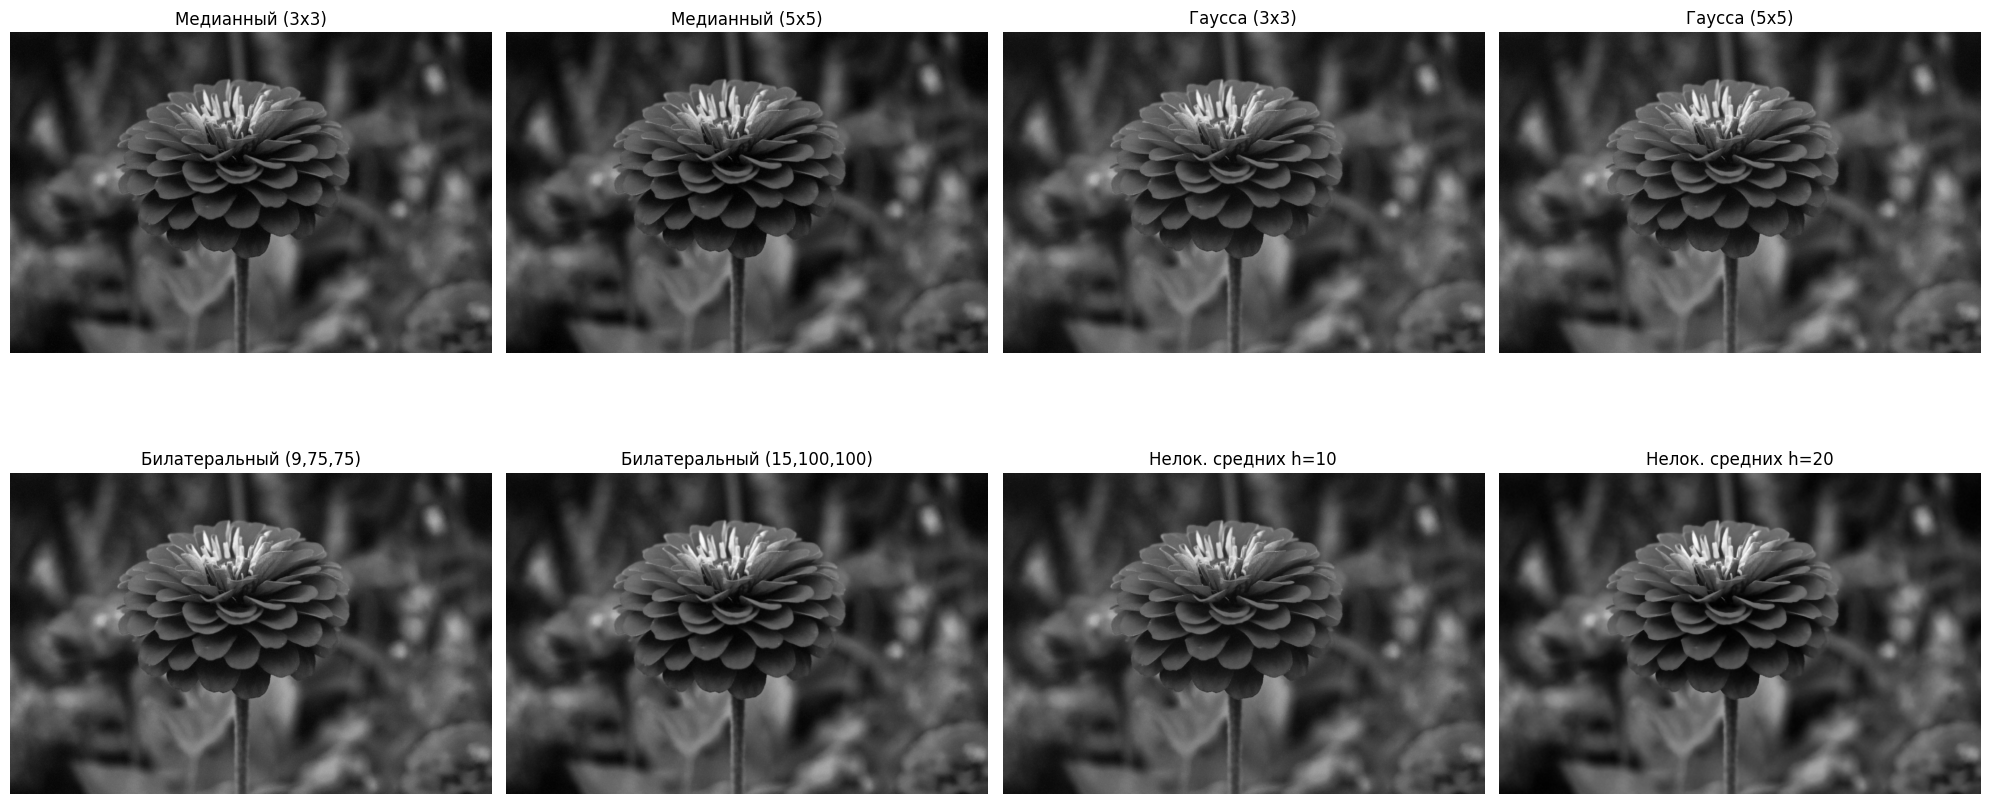

In [5]:
# Применяем различные фильтры
image_gauss_median3 = cv2.medianBlur(image_noise_gauss, 3)
image_gauss_median5 = cv2.medianBlur(image_noise_gauss, 5)
image_gauss_gauss33 = cv2.GaussianBlur(image_noise_gauss, (3, 3), 0)
image_gauss_gauss55 = cv2.GaussianBlur(image_noise_gauss, (5, 5), 0)
image_gauss_bilat9 = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
image_gauss_bilat15 = cv2.bilateralFilter(image_noise_gauss, 15, 100, 100)
image_gauss_fastNl10 = cv2.fastNlMeansDenoising(image_noise_gauss, h=10, templateWindowSize=7)
image_gauss_fastNl20 = cv2.fastNlMeansDenoising(image_noise_gauss, h=20, templateWindowSize=7)

images = {
    'Медианный (3x3)': image_gauss_median3, 
    'Медианный (5x5)': image_gauss_median5,
    'Гаусса (3x3)': image_gauss_gauss33, 
    'Гаусса (5x5)': image_gauss_gauss55,
    'Билатеральный (9,75,75)': image_gauss_bilat9, 
    'Билатеральный (15,100,100)': image_gauss_bilat15,
    'Нелок. средних h=10': image_gauss_fastNl10, 
    'Нелок. средних h=20': image_gauss_fastNl20
}

def get_res(filter_img) -> list:
    mse = mean_squared_error(image_gray, filter_img)
    ssim = structural_similarity(image_gray, filter_img)
    return [mse, ssim]

# Сортируем по SSIM (чем выше, тем лучше)
images_place = sorted(((k, get_res(v)) for k, v in images.items()), key=lambda x: x[1][1], reverse=True)

print("📊 РЕЙТИНГ ФИЛЬТРОВ ДЛЯ ГАУССОВСКОГО ШУМА:")
for i, (name, metrics) in enumerate(images_place, 1):
    print(f"   {i}: {name:25} MSE: {metrics[0]:8.1f}, SSIM: {metrics[1]:.4f}")

# Визуализация результатов
plt.figure(figsize=(20, 10))
for i, (name, img) in enumerate(images.items()):
    plt.subplot(2, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')
plt.tight_layout()
plt.show()

## 5. 🔧 ФИЛЬТРАЦИЯ РАВНОМЕРНОГО ШУМА

📊 РЕЙТИНГ ФИЛЬТРОВ ДЛЯ РАВНОМЕРНОГО ШУМА:
   1: Нелок. средних h=10       MSE:    221.3, SSIM: 0.7930
   2: Гаусса (5x5)              MSE:    223.5, SSIM: 0.7850
   3: Нелок. средних h=20       MSE:    222.7, SSIM: 0.7814
   4: Билатеральный (15,100,100) MSE:    223.4, SSIM: 0.7794
   5: Билатеральный (9,75,75)   MSE:    223.4, SSIM: 0.7778
   6: Гаусса (3x3)              MSE:    226.6, SSIM: 0.7696
   7: Медианный (5x5)           MSE:    229.9, SSIM: 0.7255
   8: Медианный (3x3)           MSE:    237.1, SSIM: 0.6776


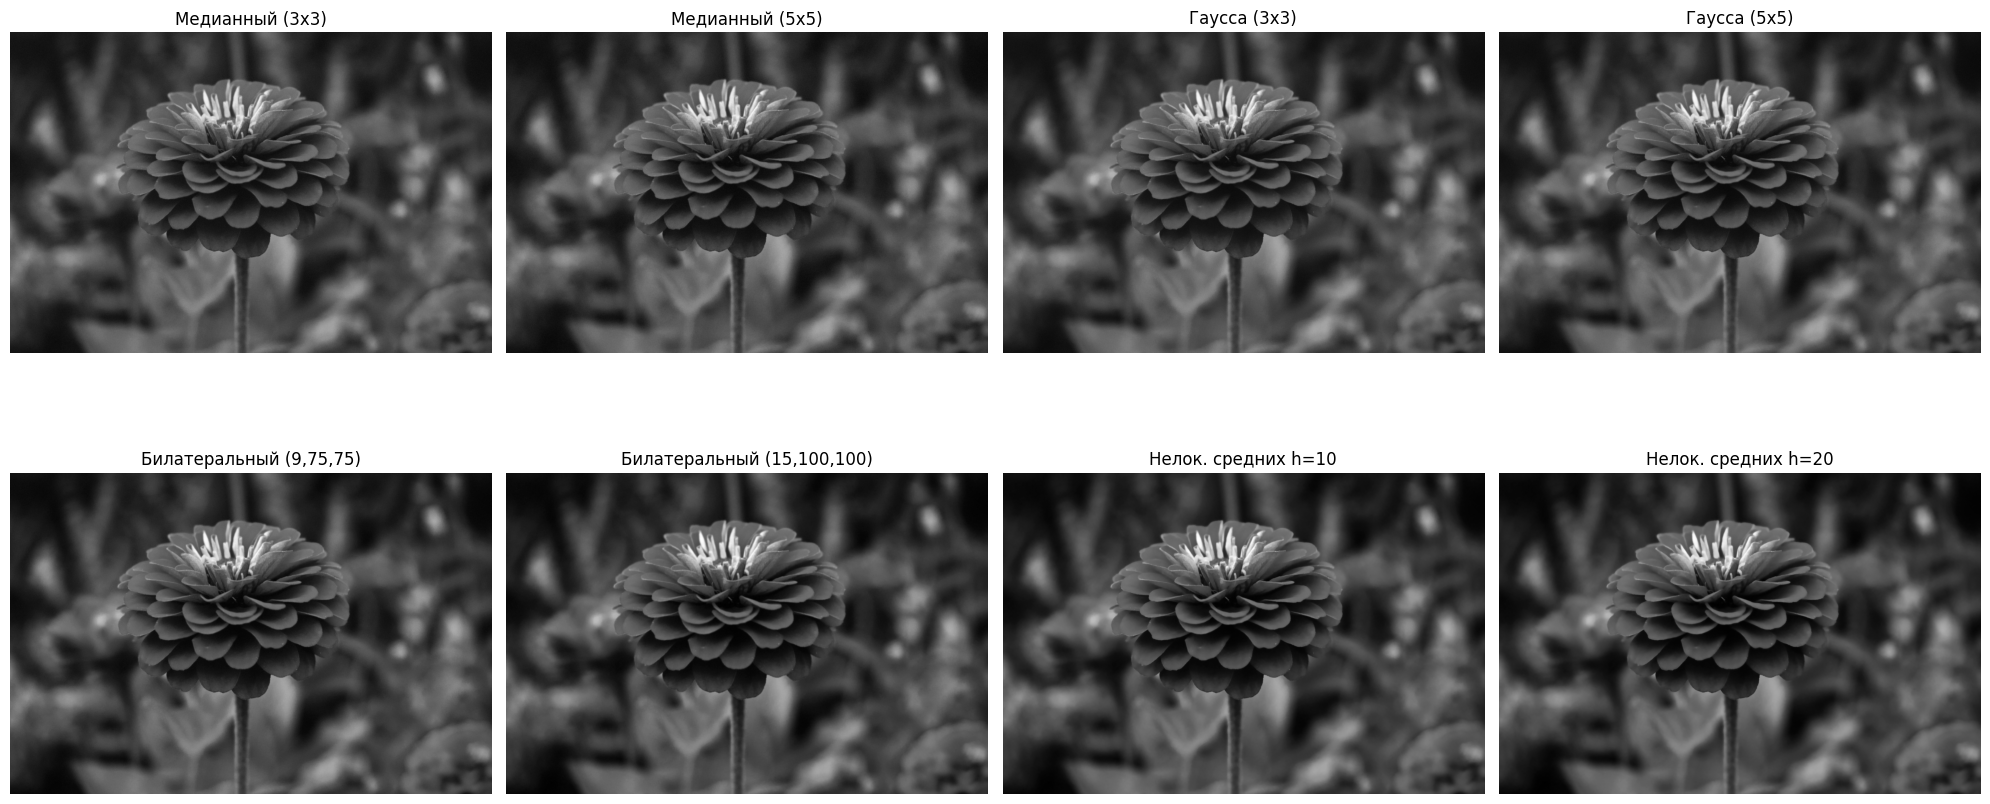

In [6]:
# Применяем различные фильтры для равномерного шума
image_uniform_median3 = cv2.medianBlur(image_noise_uniform, 3)
image_uniform_median5 = cv2.medianBlur(image_noise_uniform, 5)
image_uniform_gauss33 = cv2.GaussianBlur(image_noise_uniform, (3, 3), 0)
image_uniform_gauss55 = cv2.GaussianBlur(image_noise_uniform, (5, 5), 0)
image_uniform_bilat9 = cv2.bilateralFilter(image_noise_uniform, 9, 75, 75)
image_uniform_bilat15 = cv2.bilateralFilter(image_noise_uniform, 15, 100, 100)
image_uniform_fastNl10 = cv2.fastNlMeansDenoising(image_noise_uniform, h=10, templateWindowSize=7)
image_uniform_fastNl20 = cv2.fastNlMeansDenoising(image_noise_uniform, h=20, templateWindowSize=7)

images_uniform = {
    'Медианный (3x3)': image_uniform_median3, 
    'Медианный (5x5)': image_uniform_median5,
    'Гаусса (3x3)': image_uniform_gauss33, 
    'Гаусса (5x5)': image_uniform_gauss55,
    'Билатеральный (9,75,75)': image_uniform_bilat9, 
    'Билатеральный (15,100,100)': image_uniform_bilat15,
    'Нелок. средних h=10': image_uniform_fastNl10, 
    'Нелок. средних h=20': image_uniform_fastNl20
}

# Сортируем по SSIM
images_uniform_place = sorted(((k, get_res(v)) for k, v in images_uniform.items()), key=lambda x: x[1][1], reverse=True)

print("📊 РЕЙТИНГ ФИЛЬТРОВ ДЛЯ РАВНОМЕРНОГО ШУМА:")
for i, (name, metrics) in enumerate(images_uniform_place, 1):
    print(f"   {i}: {name:25} MSE: {metrics[0]:8.1f}, SSIM: {metrics[1]:.4f}")

# Визуализация результатов
plt.figure(figsize=(20, 10))
for i, (name, img) in enumerate(images_uniform.items()):
    plt.subplot(2, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')
plt.tight_layout()
plt.show()

## 6. 🏆 ОПРЕДЕЛЕНИЕ ЛУЧШЕГО ФИЛЬТРА

In [7]:
# Усредняем результаты по обоим типам шума
average_scores = {}
all_filters = set(images.keys()) | set(images_uniform.keys())

for filter_name in all_filters:
    scores = []
    if filter_name in images:
        scores.append(images_place[[x[0] for x in images_place].index(filter_name)][1][1])
    if filter_name in images_uniform:
        scores.append(images_uniform_place[[x[0] for x in images_uniform_place].index(filter_name)][1][1])
    
    if scores:
        avg_ssim = np.mean(scores)
        average_scores[filter_name] = avg_ssim

# Сортируем по среднему SSIM
best_filters = sorted(average_scores.items(), key=lambda x: x[1], reverse=True)

print("📈 СРЕДНИЕ РЕЗУЛЬТАТЫ ПО ВСЕМ ТИПАМ ШУМА:")
for i, (filter_name, avg_ssim) in enumerate(best_filters, 1):
    print(f"   {i}: {filter_name:25} Средний SSIM: {avg_ssim:.4f}")

best_filter_name, best_avg_ssim = best_filters[0]
print(f"\n🎯 ЛУЧШИЙ ФИЛЬТР В ЦЕЛОМ: {best_filter_name}")
print(f"   Средний SSIM: {best_avg_ssim:.4f}")

📈 СРЕДНИЕ РЕЗУЛЬТАТЫ ПО ВСЕМ ТИПАМ ШУМА:
   1: Нелок. средних h=20       Средний SSIM: 0.7896
   2: Билатеральный (15,100,100) Средний SSIM: 0.7861
   3: Билатеральный (9,75,75)   Средний SSIM: 0.7737
   4: Медианный (5x5)           Средний SSIM: 0.7348
   5: Гаусса (5x5)              Средний SSIM: 0.7325
   6: Гаусса (3x3)              Средний SSIM: 0.6798
   7: Медианный (3x3)           Средний SSIM: 0.6397
   8: Нелок. средних h=10       Средний SSIM: 0.6160

🎯 ЛУЧШИЙ ФИЛЬТР В ЦЕЛОМ: Нелок. средних h=20
   Средний SSIM: 0.7896
